In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
from sklearn.linear_model import LinearRegression

## Tarifario ISR

In [ ]:
dict_tarifas = {
    1:
        {
        "limite_inferior": 0.01,
        "limite_superior": 746.04,
        "cuota_fija": 0,
        "pct_aplicable": 1.92},
    2:
        {
        "limite_inferior": 746.05,
        "limite_superior": 6332.04,
        "cuota_fija": 14.32,
        "pct_aplicable": 6.4},
    3:
        {
        "limite_inferior": 6332.05,
        "limite_superior": 11128.01,
        "cuota_fija": 371.83,
        "pct_aplicable": 10.88},
    4:
        {
        "limite_inferior": 11128.02,
        "limite_superior": 12935.82,
        "cuota_fija": 893.63,
        "pct_aplicable": 16},
    5:
        {
        "limite_inferior": 12935.83,
        "limite_superior": 15487.71,
        "cuota_fija": 1182.88,
        "pct_aplicable": 17.92},
    6:
        {
        "limite_inferior": 15487.72,
        "limite_superior": 31236.49,
        "cuota_fija": 1640.18,
        "pct_aplicable": 21.36},
    7:
        {
        "limite_inferior": 31236.50,
        "limite_superior": 49233.00,
        "cuota_fija": 5004.12,
        "pct_aplicable": 23.52},
    8:
        {
        "limite_inferior": 49233.01,
        "limite_superior": 93993.90,
        "cuota_fija": 9236.89,
        "pct_aplicable": 30},
    9:
        {
        "limite_inferior": 93993.91,
        "limite_superior": 125325.20,
        "cuota_fija": 22665.17,
        "pct_aplicable": 32},
    10:
        {
        "limite_inferior": 125325.21,
        "limite_superior": 375975.61,
        "cuota_fija": 32691.18,
        "pct_aplicable": 34},
    11:
        {
        "limite_inferior": 375975.62,
        "limite_superior": 10000000000000000000,
        "cuota_fija": 117912.32,
        "pct_aplicable": 35}
}

## Funciones

In [ ]:
dict_tarifas[1]

{'limite_inferior': 0.01,
 'limite_superior': 746.04,
 'cuota_fija': 0,
 'pct_aplicable': 1.92}

In [ ]:
def calculo_neto(salario_bruto: float, dict_tarifas: dict):

    # Busqueda de impuesto isr por tarifario
    for key, value in dict_tarifas.items():

        if value["limite_inferior"] <= salario_bruto and salario_bruto <= value["limite_superior"]:
            impuesto_issr = value["cuota_fija"] + value["pct_aplicable"] * (salario_bruto - value["limite_inferior"]) / 100
            flag_aplicado = True
            break

    # Aproximacion imss
    impuesto_imss = salario_bruto * .027

    salario_neto = salario_bruto - impuesto_issr - impuesto_imss

    return salario_neto, impuesto_issr, impuesto_imss

## Curva de impuesto por Salario ganado

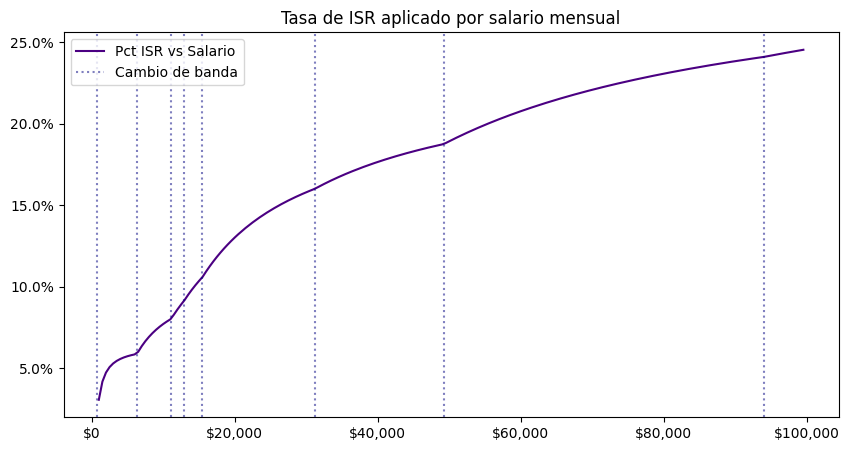

In [ ]:
tabla_salarios = pd.DataFrame(columns=["salario_bruto", "salario_neto", "isr", "imss", "pct_isr"])
i = 0

for salario in range(1000, 100000, 500):
    neto, isr, imss = calculo_neto(salario, dict_tarifas)

    pct_isr = 100 * isr / salario
    tabla_salarios.loc[i, :] = (salario, neto, isr, imss, pct_isr)

    i += 1

figure, axes = plt.subplots(1, 1, figsize=(10, 5))
#axes.plot(tabla_salarios["salario_bruto"], tabla_salarios["salario_bruto"], label="Salario Bruto sin impuesto", color="b", linestyle="dotted")
#axes.plot(tabla_salarios["salario_bruto"], tabla_salarios["salario_neto"], label="Salario Neto")
#axes.plot(tabla_salarios["salario_bruto"], tabla_salarios["isr"], label="Monto del ISR", color="indigo")
axes.plot(tabla_salarios["salario_bruto"], tabla_salarios["pct_isr"], label="Pct ISR vs Salario", color="indigo")

for key in dict_tarifas.keys():
    val = dict_tarifas[key]["limite_superior"]
    if key == 1:
        plt.axvline(x=val, color="navy", alpha=.5, linestyle="dotted", label = "Cambio de banda")
    elif key < 9:
        plt.axvline(x=val, color="navy", alpha=.5, linestyle="dotted")
    else:
        break

axes.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: '$' + format(int(x), ',')))
axes.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title("Tasa de ISR aplicado por salario mensual")
axes.legend(loc="upper left")


In [ ]:
item

(1,
 {'limite_inferior': 0.01,
  'limite_superior': 746.04,
  'cuota_fija': 0,
  'pct_aplicable': 1.92})

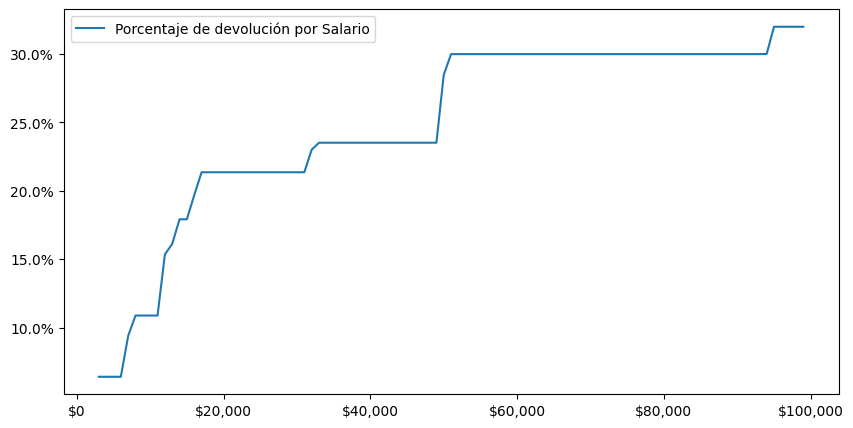

In [ ]:
tabla_ahorros = pd.DataFrame(columns=["salario_bruto", "salario_neto", "ahorro_1000_pesos", "ahorro_2000_pesos", "pct_devolucion"])
i = 0

for salario in range(3000, 100000, 1000):
    neto, isr, imss = calculo_neto(salario, dict_tarifas)
    neto_1000, isr_1000, _ = calculo_neto(salario - 1000, dict_tarifas)
    neto_2000, isr_2000, _ = calculo_neto(salario - 2000, dict_tarifas)
    ahorro_1000 = isr - isr_1000
    ahorro_2000 = isr - isr_2000

    porcentaje = ahorro_1000/1000

    tabla_ahorros.loc[i, :] = (salario, neto, ahorro_1000, ahorro_2000, porcentaje*100)

    i += 1

figure, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.plot(tabla_ahorros["salario_bruto"], tabla_ahorros["pct_devolucion"], label="Porcentaje de devolución por Salario")
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: '$' + format(int(x), ',')))

axes.legend()

Text(0.5, 1.0, 'Curvas de impuesto aplicado vs porcentaje de devolución')

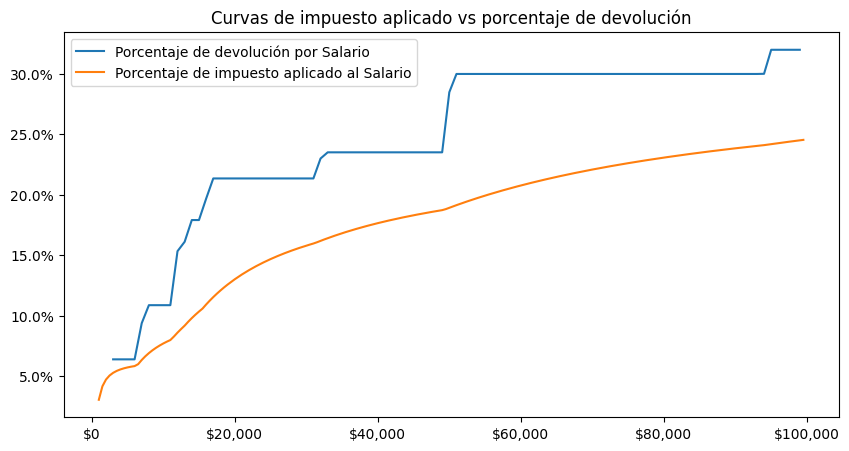

In [ ]:
figure, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.plot(tabla_ahorros["salario_bruto"], tabla_ahorros["pct_devolucion"], label="Porcentaje de devolución por Salario")
axes.plot(tabla_salarios["salario_bruto"], tabla_salarios["pct_isr"], label="Porcentaje de impuesto aplicado al Salario")
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
axes.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: '$' + format(int(x), ',')))

axes.legend()
plt.title("Curvas de impuesto aplicado vs porcentaje de devolución")

In [ ]:
## Bandas Salariales
df_devolucion_banda = pd.DataFrame(columns=["rango_salarial", "limite_inferior", "pct_devolucion"])

for i in range(2, 12, 1):
    if i < 11:

        texto  = "De \${:,.2f} a \${:,.2f}".format(dict_tarifas[i]["limite_inferior"], dict_tarifas[i]["limite_superior"])
        neto, isr, imss = calculo_neto(dict_tarifas[i]["limite_inferior"] + 200, dict_tarifas)
        neto, isr_nuevo, imss = calculo_neto(dict_tarifas[i]["limite_inferior"] + 200 - 100, dict_tarifas)
        devolucion = isr - isr_nuevo
        pct_devolucion = 100 *devolucion / 100

    else:
        texto  = "De \${:,.2f} en adelante".format(dict_tarifas[i]["limite_inferior"])
        neto, isr, imss = calculo_neto(dict_tarifas[i]["limite_inferior"] + 200, dict_tarifas)
        neto, isr_nuevo, imss = calculo_neto(dict_tarifas[i]["limite_inferior"] + 200 - 100, dict_tarifas)
        devolucion = isr - isr_nuevo
        pct_devolucion = 100 * devolucion / 100

    df_devolucion_banda.loc[i, :] = (texto, dict_tarifas[i]["limite_inferior"], pct_devolucion)

df_devolucion_banda

,rango_salarial,limite_inferior,pct_devolucion
2,"De \$746.05 a \$6,332.04",746.05,6.4
3,"De \$6,332.05 a \$11,128.01",6332.05,10.88
4,"De \$11,128.02 a \$12,935.82",11128.02,16.0
5,"De \$12,935.83 a \$15,487.71",12935.83,17.92
6,"De \$15,487.72 a \$31,236.49",15487.72,21.36
7,"De \$31,236.50 a \$49,233.00",31236.5,23.52
8,"De \$49,233.01 a \$93,993.90",49233.01,30.0
9,"De \$93,993.91 a \$125,325.20",93993.91,32.0
10,"De \$125,325.21 a \$375,975.61",125325.21,34.0
11,"De \$375,975.62 en adelante",375975.62,35.0


In [ ]:
## Bandas Salariales
df_devolucion_banda_salto = pd.DataFrame(columns=["rango_salarial", "limite_inferior", "pct_devolucion"])
monto = 700

for i in range(2, 12, 1):
    if i < 11:

        texto  = "De \${:,.2f} a \${:,.2f}".format(dict_tarifas[i]["limite_inferior"], dict_tarifas[i]["limite_superior"])
        neto, isr, imss = calculo_neto(dict_tarifas[i]["limite_inferior"] + 99, dict_tarifas)
        neto, isr_nuevo, imss = calculo_neto(dict_tarifas[i]["limite_inferior"] + 99 - monto, dict_tarifas)
        devolucion = isr - isr_nuevo
        pct_devolucion = 100 *devolucion / monto

    else:
        texto  = "De \${:,.2f} en adelante".format(dict_tarifas[i]["limite_inferior"])
        neto, isr, imss = calculo_neto(dict_tarifas[i]["limite_inferior"] + 99, dict_tarifas)
        neto, isr_nuevo, imss = calculo_neto(dict_tarifas[i]["limite_inferior"] + 99 - monto, dict_tarifas)
        devolucion = isr - isr_nuevo
        pct_devolucion = 100 * devolucion / monto

    df_devolucion_banda_salto.loc[i, :] = (texto, dict_tarifas[i]["limite_inferior"], pct_devolucion)

df_devolucion_banda_salto

,rango_salarial,limite_inferior,pct_devolucion
2,"De \$746.05 a \$6,332.04",746.05,2.553033
3,"De \$6,332.05 a \$11,128.01",6332.05,7.034457
4,"De \$11,128.02 a \$12,935.82",11128.02,11.603895
5,"De \$12,935.83 a \$15,487.71",12935.83,16.2716
6,"De \$15,487.72 a \$31,236.49",15487.72,18.406702
7,"De \$31,236.50 a \$49,233.00",31236.5,21.66557
8,"De \$49,233.01 a \$93,993.90",49233.01,24.43515
9,"De \$93,993.91 a \$125,325.20",93993.91,30.284286
10,"De \$125,325.21 a \$375,975.61",125325.21,32.282
11,"De \$375,975.62 en adelante",375975.62,34.141514


Text(0.5, 1.0, 'Porcentaje de devolución por banda salarial')

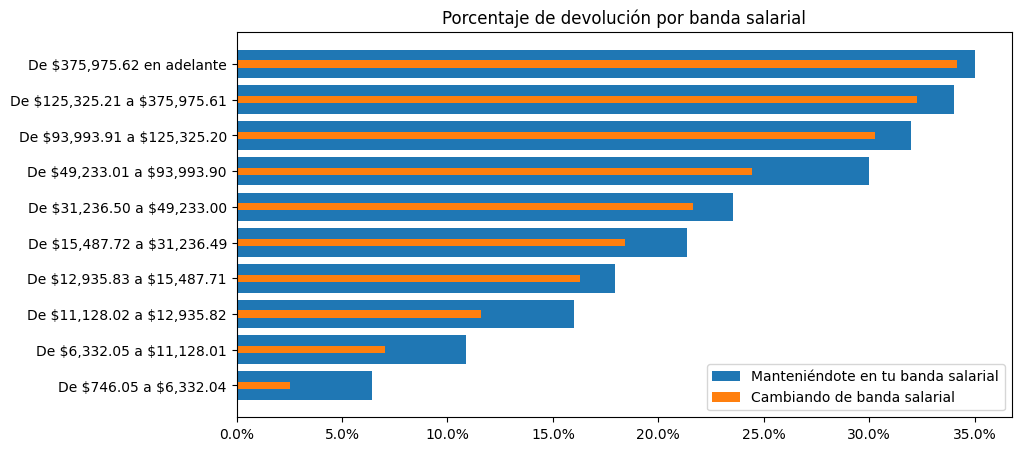

In [ ]:
figure, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.barh(y=df_devolucion_banda["rango_salarial"], width=df_devolucion_banda["pct_devolucion"], label="Manteniéndote en tu banda salarial")
axes.barh(y=df_devolucion_banda_salto["rango_salarial"], width=df_devolucion_banda_salto["pct_devolucion"], height=.2, label="Cambiando de banda salarial")

axes.xaxis.set_major_formatter(mtick.PercentFormatter())
axes.legend()

plt.title("Porcentaje de devolución por banda salarial")

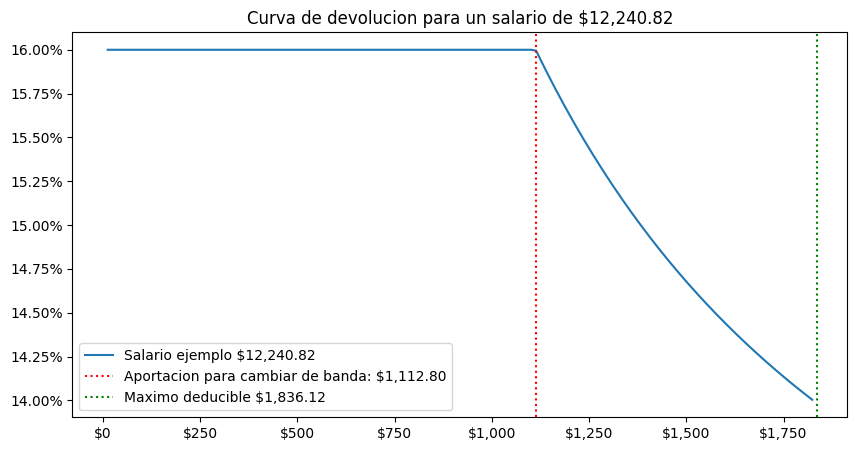

In [ ]:
## Impacto por banda salarial
figure, axes = plt.subplots(1, 1, figsize=(10, 5))

df_cambio_banda = pd.DataFrame(columns=["salario", "aportacion", "pct_devolucion"])
banda = 4

salario_base = (dict_tarifas[banda]["limite_inferior"] + .1 * dict_tarifas[banda]["limite_inferior"])

texto  = "Curva de devolucion para un salario de \${:,.2f}".format(salario_base)

aportacion_cambio = salario_base - dict_tarifas[banda]["limite_inferior"]
aportacion_cambio_2 = salario_base - dict_tarifas[banda-1]["limite_inferior"]
maximo_aportacion = salario_base * .15
neto, isr, imss = calculo_neto(salario_base, dict_tarifas)

j = 0
for pct in range(1, 150, 1):
    aportacion = salario_base * (pct/1000)
    _, isr_nuevo, _ = calculo_neto(salario_base - aportacion, dict_tarifas)
    devolucion = isr - isr_nuevo
    pct_devolucion = 100 * devolucion/aportacion

    df_cambio_banda.loc[j, :] = (salario_base, aportacion, pct_devolucion)
    j += 1

axes.plot(df_cambio_banda["aportacion"], df_cambio_banda["pct_devolucion"], label="Salario ejemplo ${:,.2f}".format(salario_base))
axes.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: '$' + format(int(x), ',')))
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
#axes.set_ylim([0, 50])

plt.axvline(x=aportacion_cambio, color="red", linestyle="dotted", label = "Aportacion para cambiar de banda: ${:,.2f}".format(aportacion_cambio))
plt.axvline(x=maximo_aportacion, color="green", linestyle="dotted", label = "Maximo deducible ${:,.2f}".format(maximo_aportacion))
plt.title(texto)

_ = axes.legend()

In [ ]:
df_cambio_banda

,salario,aportacion,pct_devolucion
0,12240.822,12.240822,16.0
1,12240.822,24.481644,16.0
2,12240.822,36.722466,16.0
3,12240.822,48.963288,16.0
4,12240.822,61.20411,16.0
...,...,...,...
144,12240.822,1774.91919,14.089945
145,12240.822,1787.160012,14.067959
146,12240.822,1799.400834,14.046272
147,12240.822,1811.641656,14.024878


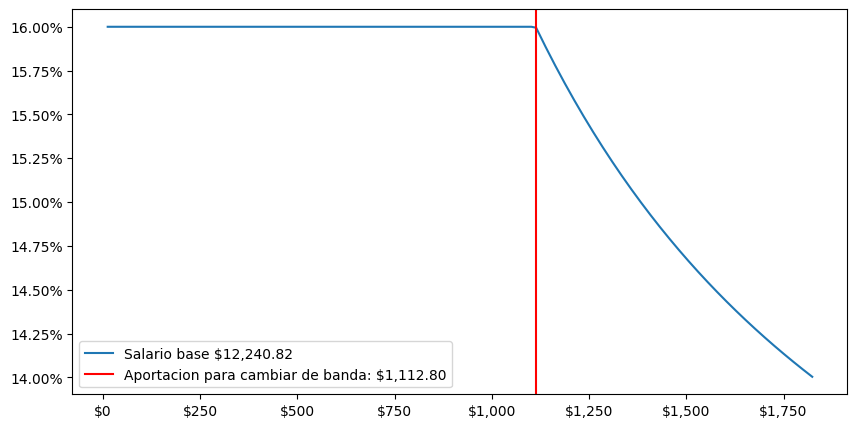

In [ ]:
figure, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.plot(df_cambio_banda["aportacion"], df_cambio_banda["pct_devolucion"], label="Salario base ${:,.2f}".format(salario_base))
plt.axvline(x=aportacion_cambio, color="red", label = "Aportacion para cambiar de banda: ${:,.2f}".format(aportacion_cambio))

axes.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: '$' + format(int(x), ',')))
axes.yaxis.set_major_formatter(mtick.PercentFormatter())

axes.legend()

## Curva con sklearn

isr = -305.705419887272 + 0.0985399143975897x + 2.517952317068377e-06x^2 + -1.0229212740525337e-11x^3


Text(0.5, 0.98, 'Tasa de ISR aplicado por salario mensual')

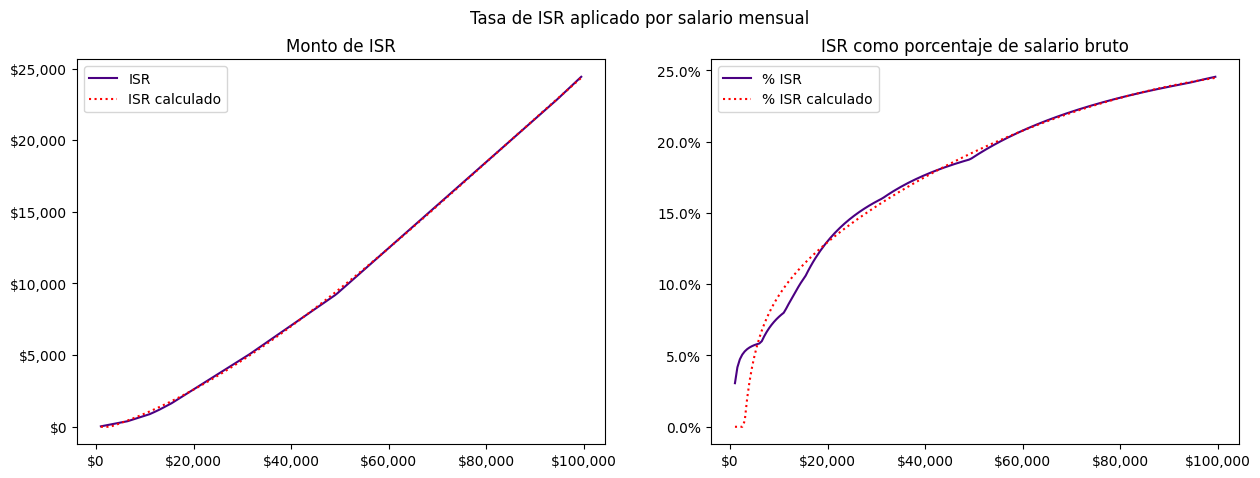

In [ ]:
tabla_salarios = pd.DataFrame(columns=["salario_bruto", "salario_neto", "isr", "imss", "pct_isr"])
i = 0

for salario in range(1000, 100000, 500):
    neto, isr, imss = calculo_neto(salario, dict_tarifas)

    pct_isr = 100 * isr / salario
    tabla_salarios.loc[i, :] = (salario, neto, isr, imss, pct_isr)

    i += 1

X = pd.DataFrame(data={"salario": tabla_salarios["salario_bruto"]})
X["salario_2"] = tabla_salarios["salario_bruto"]**2
X["salario_3"] = tabla_salarios["salario_bruto"]**3
y = tabla_salarios["isr"].array.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
tabla_salarios.loc[:, "val_predicted"] = reg.predict(X)
tabla_salarios.loc[tabla_salarios["val_predicted"] < 0, "val_predicted"] = 0
tabla_salarios.loc[:, "pct_predicted"] = 100 * tabla_salarios["val_predicted"] / tabla_salarios["salario_bruto"]


print(f"isr = {reg.intercept_[0]} + {reg.coef_[0][0]}x + {reg.coef_[0][1]}x^2 + {reg.coef_[0][2]}x^3")
# print(f"isr = {reg.intercept_[0]:.4f} + {reg.coef_[0][0]:.4f}x + {reg.coef_[0][1]:.8f}x^2 + {reg.coef_[0][2]:.12f}x^3")

figure, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(tabla_salarios["salario_bruto"], tabla_salarios["isr"], label="ISR", color="indigo")
axes[0].plot(tabla_salarios["salario_bruto"], tabla_salarios["val_predicted"], label="ISR calculado", color="red", linestyle="dotted")
axes[0].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: '$' + format(int(x), ',')))
axes[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: '$' + format(int(x), ',')))
axes[0].set_title("Monto de ISR")
axes[0].legend()

axes[1].plot(tabla_salarios["salario_bruto"], tabla_salarios["pct_isr"], label="% ISR", color="indigo")
axes[1].plot(tabla_salarios["salario_bruto"], tabla_salarios["pct_predicted"], label="% ISR calculado", color="red", linestyle="dotted")
axes[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: '$' + format(int(x), ',')))
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].set_title("ISR como porcentaje de salario bruto")
axes[1].legend()

figure.suptitle("Tasa de ISR aplicado por salario mensual")


In [ ]:
tabla_salarios

,salario_bruto,salario_neto,isr,imss,pct_isr,val_predicted,pct_predicted
0,1000,942.4272,30.5728,27.0,3.05728,0.000000,0.0
1,1500,1396.9272,62.5728,40.5,4.17152,0.000000,0.0
2,2000,1851.4272,94.5728,54.0,4.72864,0.000000,0.0
3,2500,2305.9272,126.5728,67.5,5.062912,0.000000,0.0
4,3000,2760.4272,158.5728,81.0,5.28576,12.299705,0.40999
...,...,...,...,...,...,...,...
193,97500,71080.3812,23787.1188,2632.5,24.397045,23757.178721,24.366337
194,98000,71406.8812,23947.1188,2646.0,24.435836,23905.967047,24.393844
195,98500,71733.3812,24107.1188,2659.5,24.474232,24054.510654,24.420823
196,99000,72059.8812,24267.1188,2673.0,24.512241,24202.801872,24.447275


In [ ]:
print(f"isr = {reg.intercept_[0]:.4f} + {reg.coef_[0][0]:.4f}x + {reg.coef_[0][1]:.8f}x^2")


isr = -3231.9330 + 0.2602x + 0.00000027x^2


In [ ]:
-847.9943 + 0.1610 * tabla_salarios["salario_bruto"] + 0.00000098*tabla_salarios["salario_bruto"]**2

0        -686.0143
1        -604.2893
2        -522.0743
3        -439.3693
4        -356.1743
          ...     
993    321805.6307
994    322373.9257
995    322942.7107
996    323511.9857
997    324081.7507
Name: salario_bruto, Length: 998, dtype: object

In [ ]:
tabla_salarios

,salario_bruto,salario_neto,isr,imss,pct_isr,val_predicted,pct_predicted
0,1000,942.4272,30.5728,27.0,3.05728,0.000000,0.0
1,1500,1396.9272,62.5728,40.5,4.17152,0.000000,0.0
2,2000,1851.4272,94.5728,54.0,4.72864,0.000000,0.0
3,2500,2305.9272,126.5728,67.5,5.062912,0.000000,0.0
4,3000,2760.4272,158.5728,81.0,5.28576,0.000000,0.0
...,...,...,...,...,...,...,...
993,497500,323621.647,160445.853,13432.5,32.250423,159650.218058,32.090496
994,498000,323933.147,160620.853,13446.0,32.253183,159812.992893,32.090962
995,498500,324244.647,160795.853,13459.5,32.255938,159975.696357,32.091414
996,499000,324556.147,160970.853,13473.0,32.258688,160138.328241,32.091849
